In [1]:
import numpy as np
import pandas as pd
import random

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import folium
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Configurações de parâmetros do Matplotlib
plt.rcParams['figure.figsize'] = (11, 7)
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/minerandodados/mdrepo/master/kc_house_data.csv', sep=',')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3.0,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3.0,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3.0,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
print('Este DataFrame possui {} linhas e {} colunas.'.format(df.shape[0], df.shape[1]))

Este DataFrame possui 21613 linhas e 21 colunas.


In [5]:
del df['id']
del df['date']
del df['sqft_living15']
del df['sqft_lot15']


In [6]:
print('Este DataFrame possui {} linhas e {} colunas.'.format(df.shape[0], df.shape[1]))

Este DataFrame possui 21613 linhas e 17 colunas.


In [7]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [8]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

In [9]:
df.count()

price            21613
bedrooms         21609
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21612
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
dtype: int64

In [10]:
df.isnull().sum()

price            0
bedrooms         4
bathrooms        0
sqft_living      0
sqft_lot         0
floors           1
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64

In [11]:
# O pandas te dá algumas formas de resolver isso, uma delas é remover todas as linhas onde tem colunas com valores faltantes.
df.dropna(inplace=True)

In [12]:
# Execute novamente o comando para checar os valores faltantes e veja que as linhas foram removidas
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64

<b>Aqui queremos descobrir quais são as casas que mais tiveram visitas ou visualizações (view). Essa variável é importante para descobrirmos quais são os fatores que fazem uma determinada casa ter muitas(ou poucas) visitações. 

<b> Explorando os dados

In [13]:
df['view']
df.sort_values(by='view', ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
19803,715000.0,4.0,2.50,3020,7035,2.0,0,4,3,9,3020,0,2001,0,98065,47.5344,-121.874
6511,1015000.0,3.0,2.50,2920,34527,1.0,0,4,4,9,1800,1120,1954,1983,98116,47.5799,-122.400
6402,2903000.0,5.0,2.50,3750,91681,2.0,1,4,3,10,3750,0,1925,0,98118,47.5379,-122.264
4408,1705000.0,3.0,3.00,2490,27702,2.0,1,4,3,10,2490,0,2000,0,98116,47.5596,-122.403
9856,629000.0,3.0,1.75,1460,12367,2.0,1,4,4,8,1120,340,1970,0,98023,47.3311,-122.375
6508,3650000.0,6.0,4.75,5480,19401,1.5,1,4,5,11,3910,1570,1936,0,98105,47.6515,-122.277
11167,750000.0,5.0,1.75,2640,13290,1.0,1,4,4,8,1400,1240,1954,0,98178,47.5022,-122.223
14822,2600000.0,3.0,3.00,3410,16015,2.0,1,4,4,10,2220,1190,1973,0,98040,47.5721,-122.239
7269,1615000.0,4.0,3.25,4250,12281,2.0,0,4,3,12,3020,1230,1996,0,98006,47.5507,-122.113
1420,1700000.0,4.0,3.75,3190,17186,2.0,1,4,3,10,3190,0,1999,0,98178,47.5115,-122.246


O código value_counts é interessante, pois ele nos mostra a quantidade de dados total daquela informação que estamos buscando. Nesse caso queremos saber quais são as casas por quantidade de quartos. Mas poderia ter sido ao invés de quartos, buscar quantas casas estão na frente da praia por exemplo. 

In [14]:
pd.value_counts(df['bedrooms'])


3.0     9822
4.0     6881
2.0     2758
5.0     1601
6.0      272
1.0      199
7.0       38
8.0       13
0.0       13
9.0        6
10.0       3
11.0       1
33.0       1
Name: bedrooms, dtype: int64

Vimos que a quantidade de casas com 3 quartos é a maioria. Então vamos imprimir os imóveis com somente 3 quartos. 

In [15]:
df.loc[df['bedrooms']==1]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
154,350000.0,1.0,1.00,700,5100,1.0,0,0,3,7,700,0,1942,0,98115,47.6790,-122.300
264,369900.0,1.0,0.75,760,10079,1.0,1,4,5,5,760,0,1936,0,98070,47.4683,-122.438
350,299000.0,1.0,0.75,560,12120,1.0,0,0,3,4,560,0,1967,0,98014,47.6750,-121.854
465,80000.0,1.0,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,98014,47.6499,-121.909
648,157000.0,1.0,1.00,870,26326,1.0,0,0,3,6,870,0,1939,0,98198,47.4152,-122.300
860,245000.0,1.0,0.75,380,15000,1.0,0,0,3,5,380,0,1963,0,98168,47.4810,-122.323
903,200000.0,1.0,1.50,1010,1157,2.0,0,0,3,8,950,60,2007,0,98126,47.5492,-122.372
1066,140000.0,1.0,1.00,730,6890,1.0,0,0,4,4,730,0,1926,0,98055,47.4670,-122.215
1149,75000.0,1.0,0.00,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906
1378,279200.0,1.0,1.00,640,6350,1.0,0,0,3,5,640,0,1939,0,98117,47.6976,-122.359


Imagine, que você é um cientista de dados e recebe uma proposta de trabalho para trabalhar e viver em Seatle. Esse dataset é referente a Seatle. Você tem preferência por uma casa com 3 quartos e ao menos dois banheiros. Então vamos explorar e afunilar ainda mais essa dataset. 

In [16]:
df.loc[(df['bedrooms']==3) & (df['bathrooms'] > 2) & (df['price'] < 200000) & (df['yr_built']> 1990)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
2126,180500.0,3.0,2.50,1800,8518,2.0,0,0,3,7,1800,0,1996,0,98030,47.3643,-122.185
8930,199950.0,3.0,3.00,1530,2132,2.0,0,0,3,8,1530,0,1993,0,98038,47.3746,-122.056
9337,182500.0,3.0,2.25,1830,4744,2.0,0,0,3,7,1830,0,1997,0,98001,47.2734,-122.248
11463,199000.0,3.0,2.50,1750,6725,1.0,0,0,3,7,1330,420,1993,0,98038,47.3520,-122.058
14648,183750.0,3.0,2.50,1770,3451,2.0,0,0,3,7,1770,0,2004,0,98055,47.4325,-122.197
15976,154000.0,3.0,3.00,1530,9997,1.0,0,0,3,6,1020,510,1992,0,98001,47.2861,-122.252
16521,187000.0,3.0,2.50,1730,1803,2.0,0,0,3,7,1730,0,2005,0,98166,47.4648,-122.335


In [17]:
df.sort_values(by='price', ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
7252,7700000.0,6.0,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323
3914,7062500.0,5.0,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214
9254,6885000.0,6.0,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240
4411,5570000.0,5.0,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233
1448,5350000.0,5.0,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220
1315,5300000.0,6.0,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210
1164,5110800.0,5.0,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211
8092,4668000.0,5.0,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210
2626,4500000.0,5.0,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280
8638,4489000.0,4.0,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219


In [18]:
df[df['bedrooms']==4].count()

price            6881
bedrooms         6881
bathrooms        6881
sqft_living      6881
sqft_lot         6881
floors           6881
waterfront       6881
view             6881
condition        6881
grade            6881
sqft_above       6881
sqft_basement    6881
yr_built         6881
yr_renovated     6881
zipcode          6881
lat              6881
long             6881
dtype: int64

<b> Alterando um dataset. 

In [ ]:
df['price_rate'] = ((df['price']) / (df['sqft_living']))

In [ ]:
df.describe()

In [ ]:
def categoriza(s):
    if s >= 500:
       return 'green'
    elif s >= 250:
       return 'blue'
    elif s >= 50:
       return 'red'


In [ ]:
df['color_rate'] = df['price_rate'].apply(categoriza)


In [ ]:
df['color_rate']

In [ ]:
pd.value_counts(df['color_rate'])

<b>Removendo dados

Caso queira remover uma coluna, use o método drop().

Esse método usamos para apagar colunas ou linhas de um dataset, veja:

Apagando a coluna recem criada “cat_size”:


In [ ]:
df.drop(['cat_size'], axis=1, inplace=True)


No comando acima, usamos o parâmetro ‘axis=1’ que significa que queremos apagar uma coluna e não uma linha.

Se quisermos apagar os imóveis que tem mais de 30 quartos é só mudar o operador, veja:

In [ ]:

df.drop(df[df.bedrooms>30].index ,inplace=True)

<b> Analisando Missing Values

É muito comum pra quem trabalha com bases de dados, encontrar valores nulos ou faltantes.

Isso pode acontecer por diversas razões como erro em coleta de dados, dados exportados com erros etc.

Como lidar com esses problemas?

O pandas possui funções interessantes para lidar com valores nulos ou faltantes em bases de dados.

O Pandas nos fornece o método isnull() que faz uma verificação em todas as linhas e colunas do dataset em busca de valores faltantes ou nulos. Veja:

In [ ]:
# É possível também remover somente linhas que estejam com valores faltantes em todas as colunas, veja como fazer isso:

df.dropna(how='all', inplace=True)

Outra recurso seria preencher tais valores faltantes com média das colunas, isso talvez fosse menos radical e afetasse menos dataset em casos onde temos poucos valores faltantes. Veja um exemplo:


In [ ]:
df['floors'].fillna(df['floors'].mean(), inplace=True)

No comando acima preenchemos o valor faltante da coluna “floors” com a média dos seus valores. Rode o comando com o método isnull() e veja que agora a coluna floors ficou 0

Outra alternativa é preencher os valores faltantes com uma constante, veja esse exemplo:

In [ ]:
df['bedrooms'].fillna(1, inplace=True)

In [ ]:
df.dtypes

O comando acima preenche todos os valores faltantes por um. 

<i> VISUALIZAÇÃO DE DADOS COM O MATPLOT

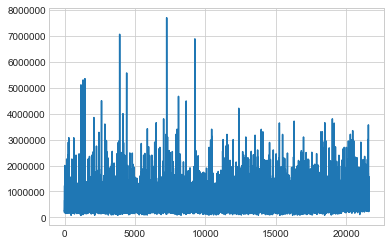

In [19]:
df['price'].plot()

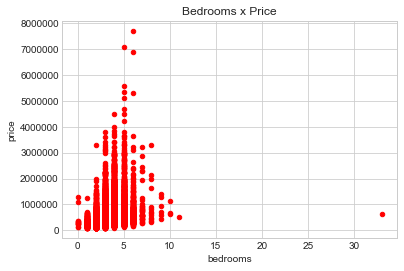

In [20]:
df.plot(x='bedrooms',y='price',kind='scatter', title='Bedrooms x Price',color='r')

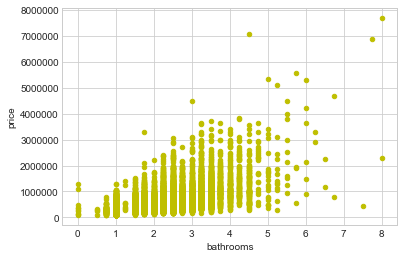

In [21]:
df.plot(x='bathrooms',y='price',kind='scatter',color='y')

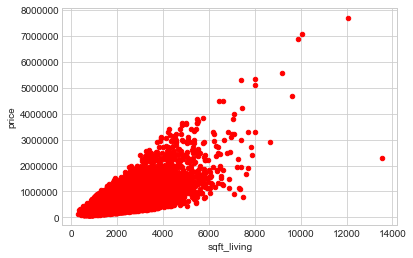

In [22]:
df.plot(x='sqft_living',y='price',kind='scatter',color='r')

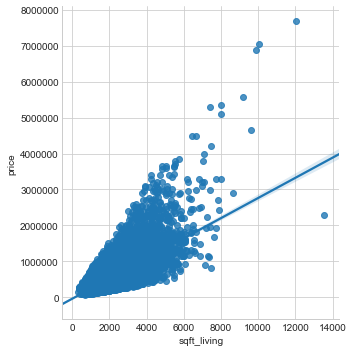

In [23]:
sns.lmplot(x='sqft_living',y='price',data=df)

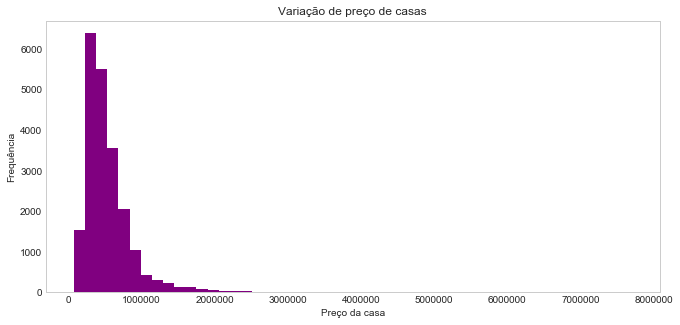

In [24]:
#Criando gráfico de histograma
plt.figure(figsize=(11, 5))
plt.hist(df['price'], bins=50, color = 'purple')
plt.grid()
plt.xlabel('Preço da casa')
plt.ylabel('Frequência')
plt.title('Variação de preço de casas')
plt.show()

O gráfico acima é quase idêntico ao anterior. A diferença aqui são as colunas, onde colocamos no eixo x o número de banheiros (bathrooms) e no eixo y o preço dos imóveis (price).


In [25]:
#Pequena amostra de como as casas estão distribuidas
quantidade_de_casas = 500

map = folium.Map(location=[df['lat'].min(), df['long'].max()], zoom_start=8)
for linha in df[0:1000].iterrows():
    folium.Marker([linha[1]['lat'], linha[1]['long']], popup='Valor da casa: U$ {:0,.0f}'.format(linha[1]['price'])).add_to(map)
map

# Criação do modelo de previsão 


In [27]:
#Dividindo dados para geração do conjunto de teste e treino
y = df['price']
#Retirando coluna de preço, o qual queremos prever no conjunto teste
x = df.drop(['price'], axis=1)

In [28]:
#Criando conjunto de dados de teste e treino
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 42)


In [29]:
#Geração do modelo
modelo = LinearRegression().fit(X_train, y_train)

In [30]:
#Score no conjunto de treino
modelo.score(X_train, y_train)

0.6993021552070476

In [31]:
#Score no conjunto de teste
modelo.score(X_test, y_test)

0.6969421976634971

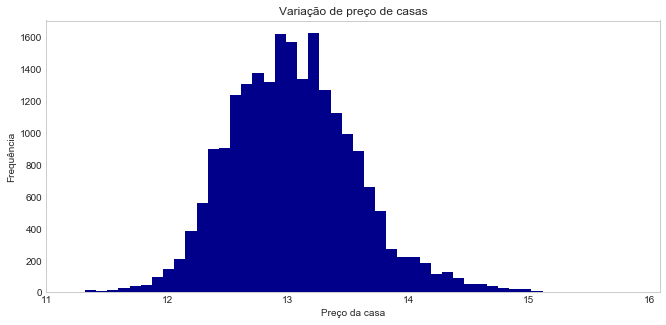

In [32]:
#Gerando gráfico com valores normalizados
plt.figure(figsize=(11, 5))
plt.hist(np.log(df['price']), bins=50, color = 'darkblue')
plt.grid()
plt.xlabel('Preço da casa')
plt.ylabel('Frequência')
plt.title('Variação de preço de casas')
plt.show()

In [34]:
#Criando distruição normal dos dados com np.log
y = np.log(df['price'])
#Retirando coluna de preço, o qual queremos prever
x = df.drop(['price'], axis=1)

In [35]:
#Criando conjunto de dados de teste e treino
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 42)

In [36]:
#Gerando modelo
modelo = LinearRegression().fit(X_train, y_train)

In [37]:
#Score no conjunto de treino
modelo.score(X_train, y_train)

0.765881891575763

In [38]:
#Score no conjunto de teste
modelo.score(X_test, y_test)

0.7614427771069718

In [39]:
#Tentando melhorar o modelo
precisao_conjunto_treino = []
precisao_conjunto_teste = []

for numero in range(100):
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = numero)
    modelo = LinearRegression().fit(X_train, y_train)
    
    precisao_conjunto_treino.append(modelo.score(X_train, y_train))
    precisao_conjunto_teste.append(modelo.score(X_test, y_test))

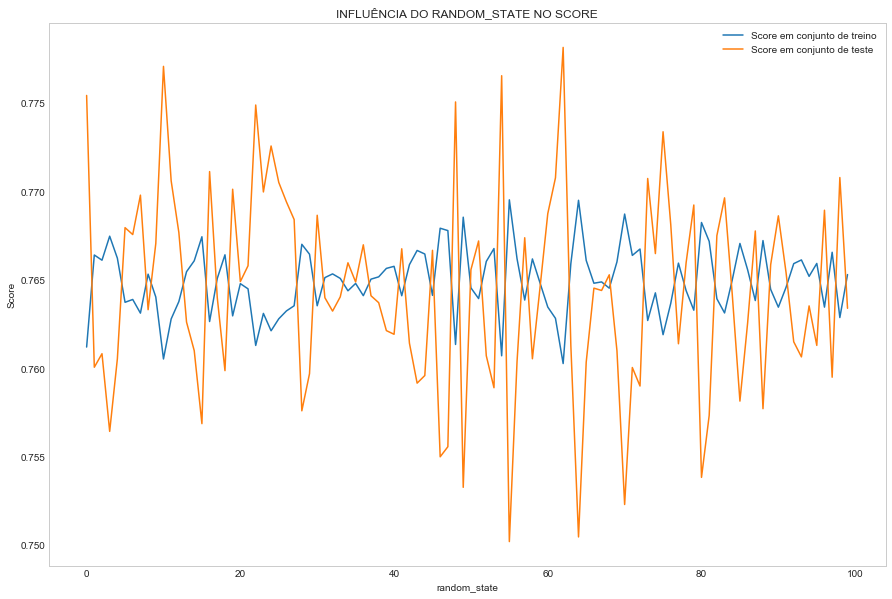

In [40]:
#Criando gráfico com cada 
plt.figure(figsize=(15, 10))
plt.grid()
plt.plot(precisao_conjunto_treino, label = 'Score em conjunto de treino')
plt.plot(precisao_conjunto_teste, label = 'Score em conjunto de teste')
plt.xlabel('random_state')
plt.ylabel('Score')
plt.title('INFLUÊNCIA DO RANDOM_STATE NO SCORE')
plt.legend()
plt.show()

In [41]:
#Armazenando em uma variável o melhor random_state e seu score
melhor_random_state = precisao_conjunto_teste.index(max(precisao_conjunto_teste))
melhor_score = max(precisao_conjunto_teste)

print('O melhor random_state é: {}; que gera um score de: {}'.format(melhor_random_state, melhor_score))

O melhor random_state é: 62; que gera um score de: 0.7781641274697253


In [42]:
#Treinando modelo com novos dados
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = melhor_random_state)
modelo = LinearRegression().fit(X_train, y_train)

In [43]:
#Mostrando valor sugerido de uma casa aleatória
preco_sugerido = modelo.predict(X_test)
preco_sugerido = np.exp(preco_sugerido)

print('Preço sugerido de venda: U$ {:0,.0f}'.format(int(preco_sugerido[random.randint(0, 100)])))

Preço sugerido de venda: U$ 541,217


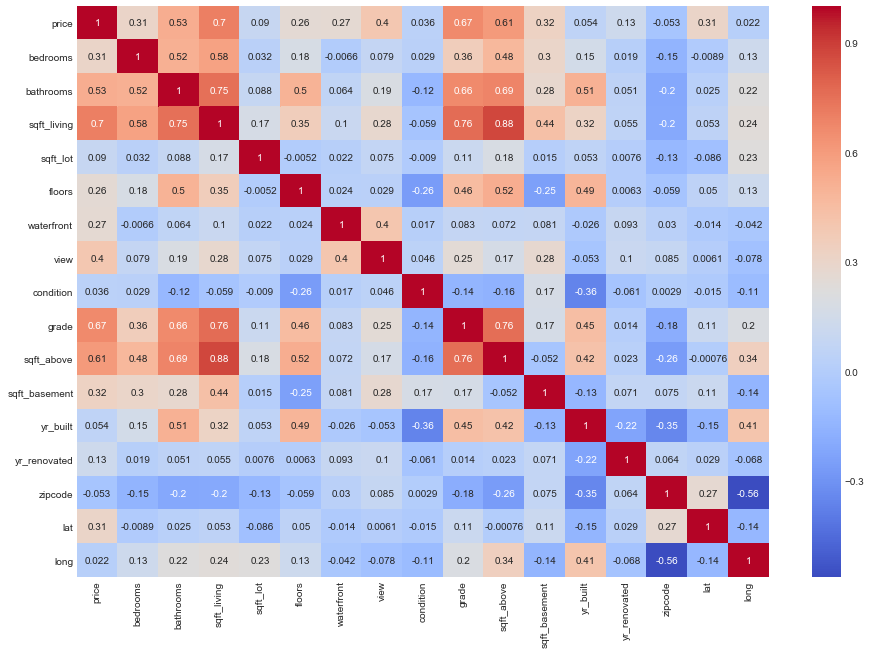

In [49]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.rcParams['figure.figsize'] = (15.5, 10.5)

<b>Com essa análise de correlação, podemos facilmente identificar que quantidade de metros quadrados no interior do imóvel (sqrt_living) tem uma correlação de 0,7020 em relação ao preço, e GRADE que é um índice de qualidade do design e construção do imóvel, onde valores mais altos significam imóveis com qualidade de construção superior, tiveram as maiores correlações em relação ao preço. 
    O padrão da qualidade e design da construção (grade) também tem uma correlação com banheiro e a quantidade de metros quadadros no interior do imóvel (sqrt_living). 
     

<b>Agora vamos começar as análises de regressão, para identificar quanto cada uma dessas variáveis, interferem no preço dos imóveis. Vou rodar mais de um modelo de regressão. Quero extrair o melhor modelo possível. 

## Treinando um modelo de regressão linear
<b>Vamos agora começar a treinar o modelo de regressão. Precisamos primeiro dividir nossos dados em uma matriz X que contém os recursos para treinar, e uma matriz y com a variável alvo, neste caso, a coluna Preço. Vamos descartar a coluna "Adress" porque só tem informações de texto que o modelo de regressão linear não pode usar.

Arrays X e y

In [99]:
X = df[['sqft_living','floors','waterfront','grade','sqft_lot', 'bedrooms', 'bathrooms', 'view','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]
y = df['price']

## Split de treino
<b>Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de testes. Vamos criar o modelo usando o conjunto de treinamento e depois usar o conjunto de testes para avaliar o modelo.

In [100]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=48)

## Criando e treinando o modelo

In [112]:
from sklearn.linear_model import LinearRegression

In [113]:
lm = LinearRegression()

In [114]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [115]:
lm.score(X_train, y_train)

0.6444729525578118

In [116]:
lm.fit(X_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [117]:
lm.score(X_test,y_test)

0.6756464143568135

In [126]:
#Tentando melhorar o modelo
precisao_conjunto_treino = []
precisao_conjunto_teste = []

for numero in range(100):
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = numero)
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    
    precisao_conjunto_treino.append(lm.score(X_train, y_train))
    precisao_conjunto_teste.append(lm.score(X_test, y_test))

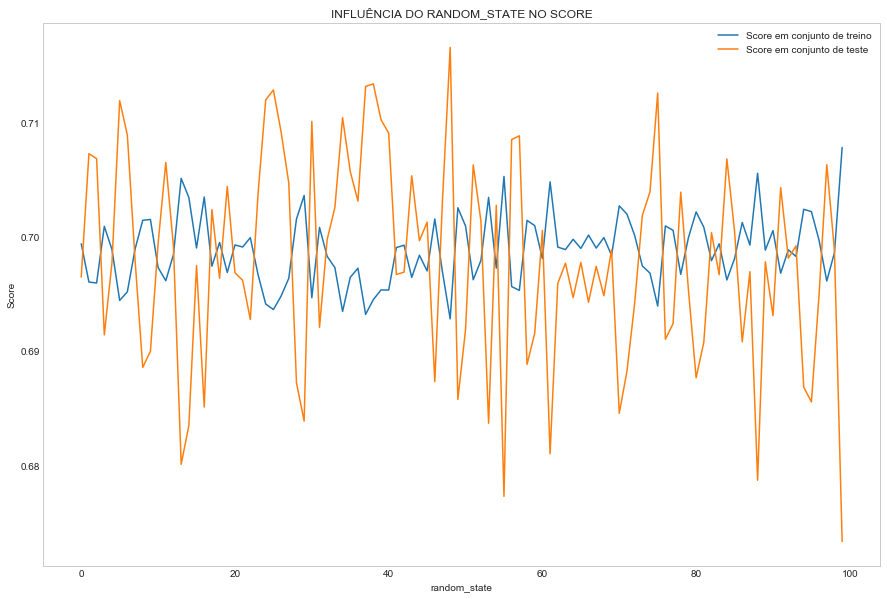

In [127]:
#Criando gráfico com cada 
plt.figure(figsize=(15, 10))
plt.grid()
plt.plot(precisao_conjunto_treino, label = 'Score em conjunto de treino')
plt.plot(precisao_conjunto_teste, label = 'Score em conjunto de teste')
plt.xlabel('random_state')
plt.ylabel('Score')
plt.title('INFLUÊNCIA DO RANDOM_STATE NO SCORE')
plt.legend()
plt.show()

In [128]:
#Armazenando em uma variável o melhor random_state e seu score
melhor_random_state = precisao_conjunto_teste.index(max(precisao_conjunto_teste))
melhor_score = max(precisao_conjunto_teste)

print('O melhor random_state é: {}; que gera um score de: {}'.format(melhor_random_state, melhor_score))

O melhor random_state é: 48; que gera um score de: 0.7166240902270122


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=48)
lm = LinearRegression().fit(X_train, y_train)

In [130]:
#Score no conjunto de treino
lm.score(X_train, y_train)

0.6444729525578118

In [131]:
#Score no conjunto de treino
lm.score(X_test, y_test)

0.6718903055834063

## Avaliação modelo

<b>Vamos avaliar o modelo ao verificar os coeficientes e como podemos interpretá-los.

In [132]:
# Printando a intercepção
print(lm.intercept_)

6543693.030022825


In [133]:

coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
sqft_living,116.360407
floors,22485.540161
waterfront,613828.963660
grade,120873.975024
sqft_lot,-0.241995
bedrooms,-42661.947963
bathrooms,49943.389870
view,45079.455766
sqft_above,59.078883
sqft_basement,57.281523


In [134]:
df['pred'] = (lm.intercept_+(df['sqft_living']*116.360407)+(df['floors']*22485.540161)+(df['waterfront']*613828.963660)+(df['grade']*120873.975024)+(df['sqft_lot']*-0.241995)+(df['bedrooms']*-42661.947963)+(df['bathrooms']*49943.389870)+(df['view']*45079.455766)+(df['sqft_above']*59.078883)+(df['sqft_basement']*57.281523)+(df['yr_built']*-3703.913493)+(df['yr_renovated']*0.191292))



## Predições do nosso modelo

<b>Vamos pegar as previsões em nosso conjunto de testes e ver o quão bem!


In [135]:
predictions = lm.predict(X_test)

In [149]:
print(y_test,predictions)

19831     925000.0
12532     539000.0
1616      349500.0
11459     561000.0
18208    2367000.0
12318     259500.0
19718     495000.0
7971      350000.0
3398      449500.0
20018     445000.0
16217     614306.0
16664     395900.0
7565      236775.0
13172     490000.0
3384     2544750.0
20544     455000.0
9038      397990.0
918       270000.0
14306     392800.0
21315     440000.0
2695      705000.0
12282     481015.0
8216      555000.0
6047      510000.0
15979     500000.0
779      2250000.0
875      1095000.0
21161     459990.0
11660     355000.0
4690      540000.0
           ...    
18183    1100000.0
17004     636100.0
9523      365000.0
9930      275000.0
15320     365000.0
435       749000.0
8273      546500.0
6319      402000.0
15926     778000.0
4125      346500.0
2550      265000.0
15089     321000.0
17764     583500.0
10057     315500.0
15064     499000.0
4489      716000.0
9828      280000.0
15490     320000.0
8381      390000.0
4177      552000.0
19588     320000.0
3077      20

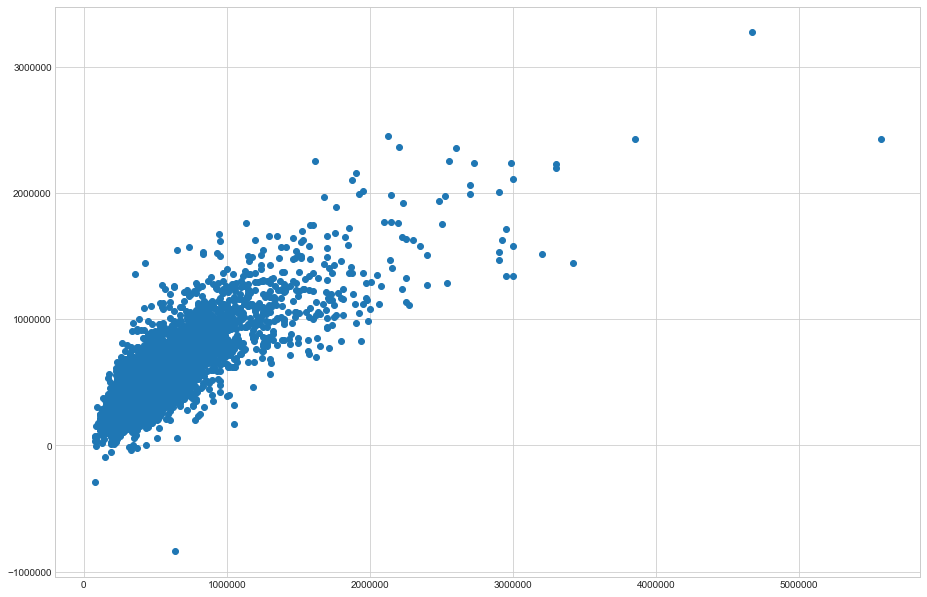

In [137]:
plt.scatter(y_test,predictions)


<b>Histograma residual

C:\Users\pheli\Anaconda3.5.2.0\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


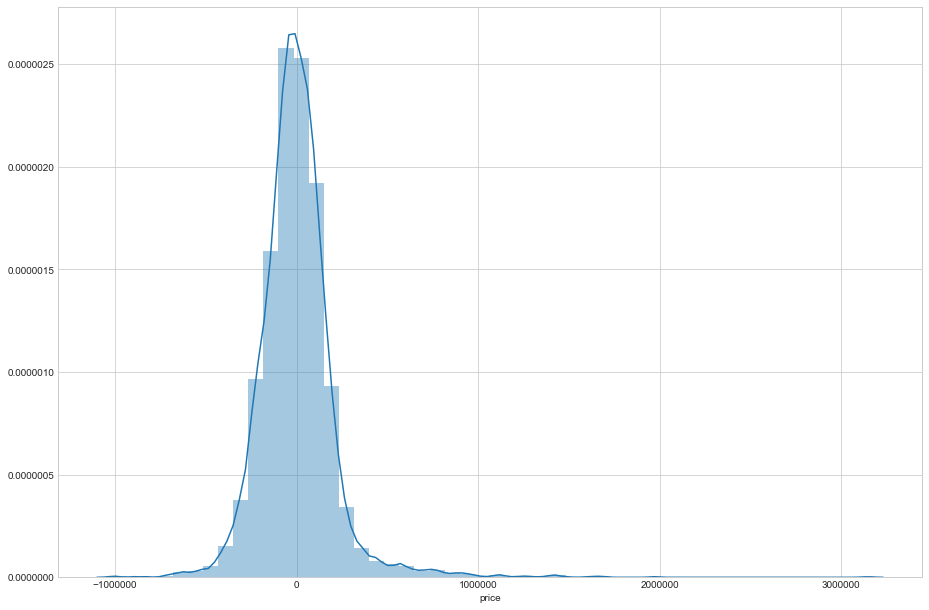

In [138]:
sns.distplot((y_test-predictions),bins=50);


In [139]:
from sklearn import metrics

In [140]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 138205.56828896145
MSE: 42844465205.931854
RMSE: 206989.0461013139


Essa é uma excelente métrica para modelos de regressão, além de ser muito fácil de interpretar. A Raiz Quadrada do Erro Quadrático Médio — ou simplesmente RMSE em inglês — <b>nada mais é que a diferença entre o valor que foi previsto pelo seu modelo e o valor real que foi observado</b>.

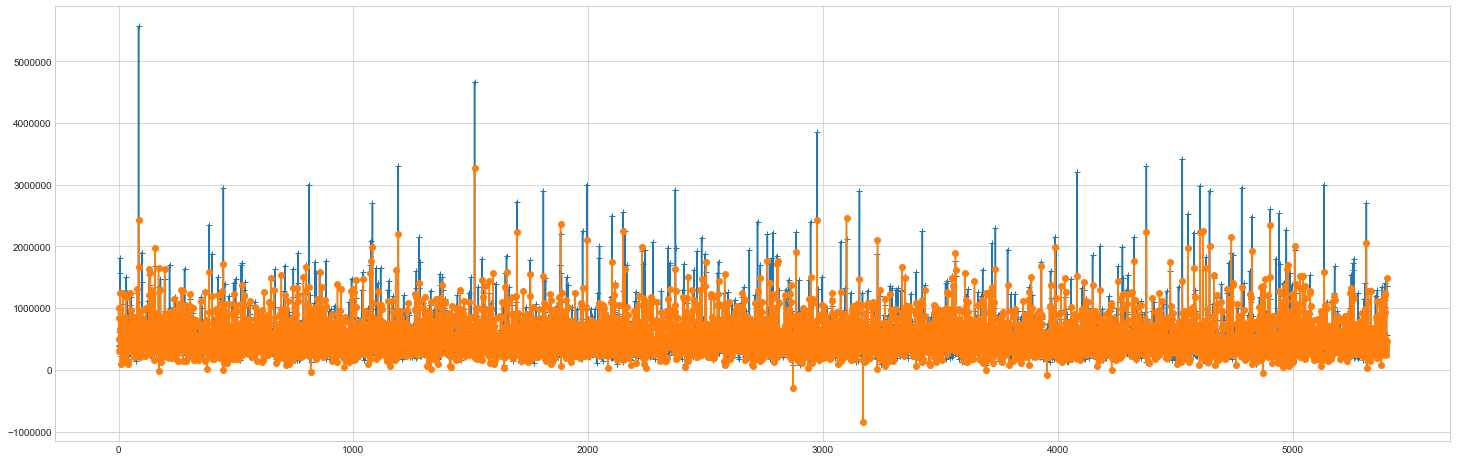

In [142]:
plt.figure(figsize=(25,8))

plt.plot(range(0, y_test.shape[0]), y_test, marker='+')
plt.plot(range(0, predictions.shape[0]), predictions, marker='o')

In [170]:
import statsmodels.api as sm

In [174]:
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     3668.
Date:                Sun, 13 Jan 2019   Prob (F-statistic):               0.00
Time:                        02:36:07   Log-Likelihood:            -2.9615e+05
No. Observations:               21608   AIC:                         5.923e+05
Df Residuals:                   21596   BIC:                         5.924e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.573e+06   1.29e+05     50.956      0.000    6.32e+06    6.83e+06
sqft_living     114.2470      2.287     49.961      0.000     109.765     118.729
floors         2.198e+04   3730.637      5.893      0.000    1.47e+04    2.93e+04
waterfront     5.759e+05   1.87e+04     30.814      0.000    5.39e+05    6.13e+05
grade          1.244e+05   2169.465     57.341      0.000     1.2e+05    1.29e+05
sqft_lot         -0.2540      0.037     -6.924      0.000      -0.326      -0.182
bedrooms      -3.814e+04   2029.602    -18.790      0.000   -4.21e+04   -3.42e+04
bathrooms      4.751e+04   3493.002     13.601      0.000    4.07e+04    5.44e+04
view           4.527e+04   2260.575     20.025      0.000    4.08e+04    4.97e+04
sqft_above       55.2760      2.186     25.286      0.000      50.991      59.561
sqft_basement    58.9709      2.787     21.163      0.000      53.509      64.433
yr_built      -3731.5301     67.704    -55.116      0.000   -3864.234   -3598.826
yr_renovated      3.7502      3.870      0.969      0.333      -3.835      11.336
==============================================================================
Omnibus:                    15942.962   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1084225.974
Skew:                           2.939   Prob(JB):                         0.00
Kurtosis:                      37.201   Cond. No.                     2.17e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.93e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
from uszipcode import ZipcodeSearchEngine
search = ZipcodeSearchEngine()
zipcode = search.by_zipcode('98146')
print(zipcode)

In [175]:
#lets scale the data
X = df.as_matrix(['bedrooms', 'bathrooms', 'sqft_living',\
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',\
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'])
y = df['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=10)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)

C:\Users\pheli\Anaconda3.5.2.0\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [176]:
#linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
#let us predict
y_pred=model.predict(X_test)
print (model.score(X_test, y_test))

0.6541445530518084


In [177]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print (model.score(X_test, y_test))

0.7307507291106952


In [178]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=500)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print (model.score(X_test, y_test))

0.7333569945634986


In [179]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print (model.score(X_test, y_test))

0.659870468457533


In [180]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print (model.score(X_test, y_test))

0.44845686897759446


In [ ]:
import folium
from folium import plugins

In [181]:
lat = df['lat'][:1000].values
long = df['long'][:1000].values

mapa5 = folium.Map(location=[47.6062100, -122.3320700],zoom_start=14)
for la,lo in zip(lat,long):
    folium.Marker([la, lo]).add_to(mapa5)
 
mapa5

In [182]:
from folium import plugins
coordenadas = []
lat = df['lat'][:21608].values
long = df['long'][:21608].values
 
mapa6 = folium.Map(location=[47.6062100, -122.3320700],tiles='Stamen Toner',zoom_start=14)
 
for la,lo in zip(lat,long):
    coordenadas.append([la,lo])
 
mapa6.add_child(plugins.HeatMap(coordenadas))
mapa6

In [ ]:

df.price.mean()

In [ ]:
df.price.kurtosis()

In [ ]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__)

In [ ]:
import cufflinks as cf

In [ ]:
init_notebook_mode(connected=True)

In [ ]:
cf.go_offline()

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

x = df.district1

trace0 = go.Box(
    y=df.price,
    x=x,
    name='kale',
    marker=dict(
        color='blue'
    )
)

data = [trace0]
layout = go.Layout(
    yaxis=dict(
        title='normalized rental prices',
        zeroline=False
    ),
    boxmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
df.columns